## **Analysis of Variance (ANOVA)**

### **Author Information**
This Jupyter Notebook is authored by **Mizbah Uddin Chowdhury**.

For more projects and information, you can visit:
- GitHub: https://www.github.com/emayzeeu
- LinkedIn: https://www.linkedin.com/in/mizbahuddinchowdhury/

### **Overview**
Analysis of Variance, commonly called ANOVA, is a group of statistical techniques that test the difference of means between three or more groups. ANOVA is an extension of t-tests. While t-tests examine the difference of means between two groups. ANOVA can test means between several groups. 

In this project, we analyze a dataset containing information on product sales across different countries. The dataset includes variables such as date of sale, product category, country of sale, store, and the number of items sold. The primary objective of this project is to investigate whether there are significant differences in the number of items sold based on product category. <br>

For this purpose, we will conduct a One-way ANOVA test.

### **Dataset Information**

The dataset used in this project is sourced from Kaggle's Playground Series Competition titled 'Forecasting Mini-Course Sales' (Playground Series - Season 3, Episode 19). The dataset contains the following columns:

- `date`: Date of a sale.
- `country`: The country where the sale was made.
- `store`: The store where the sale was made.
- `product`: The category of the product.
- `num_sold`: The number of items sold.

The dataset can be found on Kaggle's website at the following link (train_data):
https://www.kaggle.com/competitions/playground-series-s3e19/data

Before proceeding with the analysis, we performed data cleaning and handled outliers, ensuring that the dataset is ready for exploration and ANOVA testing. Let's begin!

### **Importing**

In [112]:
# importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [113]:
# reading data
df = pd.read_csv('salesdata.csv')
df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


### **Data Cleaning and Visualizations**

In [114]:
# getting basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [115]:
# getting basic statistics
df.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [116]:
# checking for null values
df.isna().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

<AxesSubplot: xlabel='num_sold', ylabel='Count'>

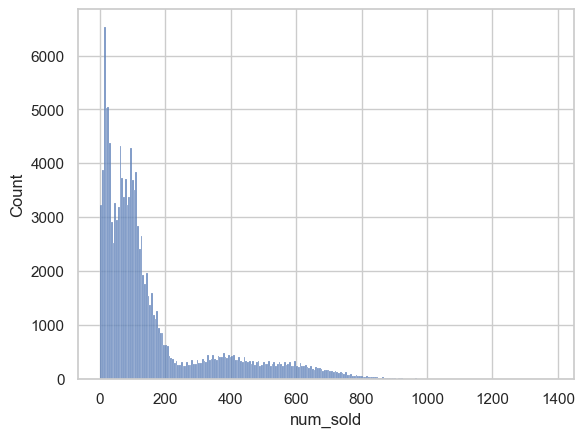

In [117]:
# checking sales distributions
sns.histplot(x=df['num_sold'])

In [118]:
# getting product categories/names
df['product'].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

In [119]:
df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [120]:
# product sold per category
df.groupby('product')['num_sold'].sum()

product
Using LLMs to Improve Your Coding                 6069281
Using LLMs to Train More LLMs                     5993975
Using LLMs to Win Friends and Influence People     932564
Using LLMs to Win More Kaggle Competitions        5068313
Using LLMs to Write Better                        4604192
Name: num_sold, dtype: int64

The product names are way too long and can be a problem in the later part. So, let's shorten the names.

In [121]:
product_mapping = {
    'Using LLMs to Improve Your Coding': 'Improve_Coding',
    'Using LLMs to Train More LLMs': 'Train_More_LLMs',
    'Using LLMs to Win Friends and Influence People': 'Win_Influence',
    'Using LLMs to Win More Kaggle Competitions': 'Win_Kaggle',
    'Using LLMs to Write Better': 'Write_Better'
}

df['product_name'] = df['product'].map(product_mapping)

In [122]:
df.groupby('product_name')['num_sold'].sum()

product_name
Improve_Coding     6069281
Train_More_LLMs    5993975
Win_Influence       932564
Win_Kaggle         5068313
Write_Better       4604192
Name: num_sold, dtype: int64

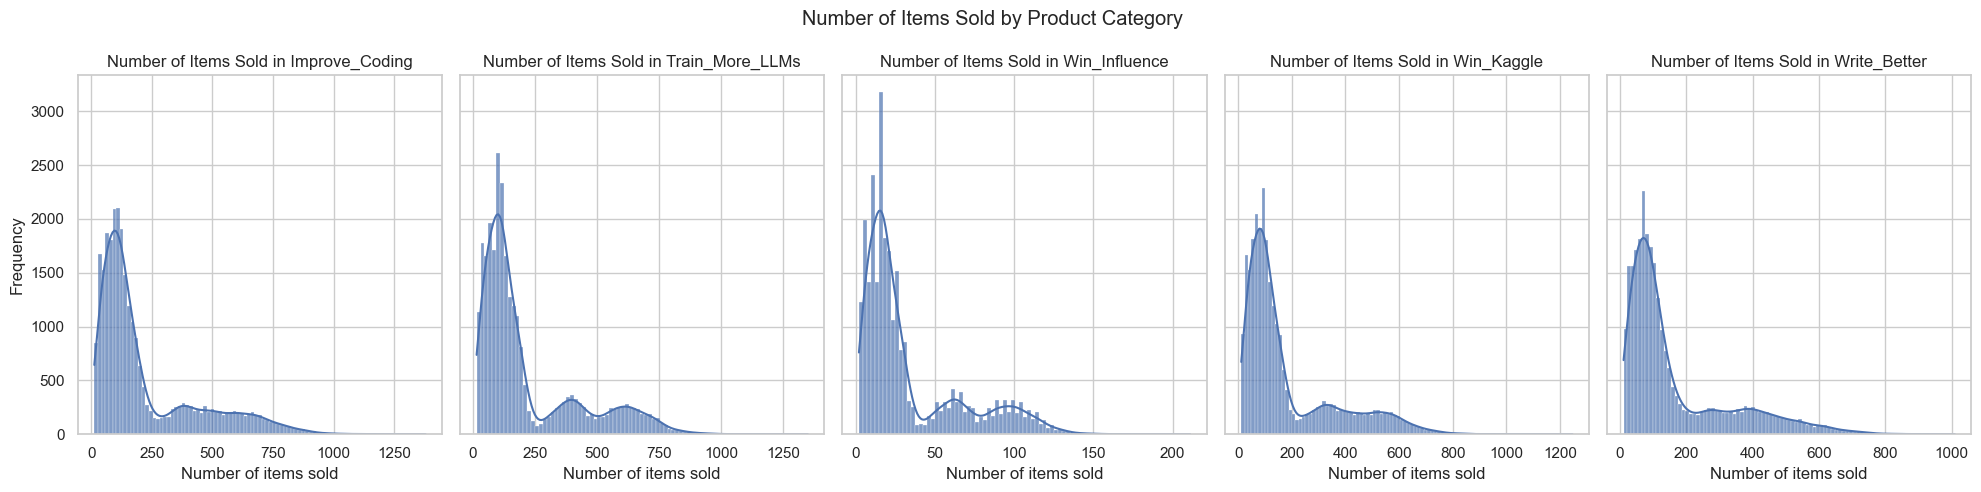

In [123]:
# checking sales distribution by product category

sns.set(style = 'whitegrid')
fig, axes = plt.subplots(1, 5, figsize = (20, 5), sharey=True)

# 1 row with 5 subplots, sharing y-axis

products = ['Improve_Coding', 'Train_More_LLMs', 'Win_Influence', 
            'Win_Kaggle', 'Write_Better']

for i, product in enumerate(products):
    # enumerate() function is used to get both the index and the value of each day in the list 
    # The index is stored in the variable i, and the day name is stored in the variable day
    product_data = df[df['product_name'] == product]
    sns.histplot(x='num_sold', data = product_data, 
                kde = True, alpha = 0.7, ax=axes[i])
    axes[i].set_xlabel('Number of items sold')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Number of Items Sold in {product}')

plt.suptitle('Number of Items Sold by Product Category')
plt.tight_layout()
plt.show()

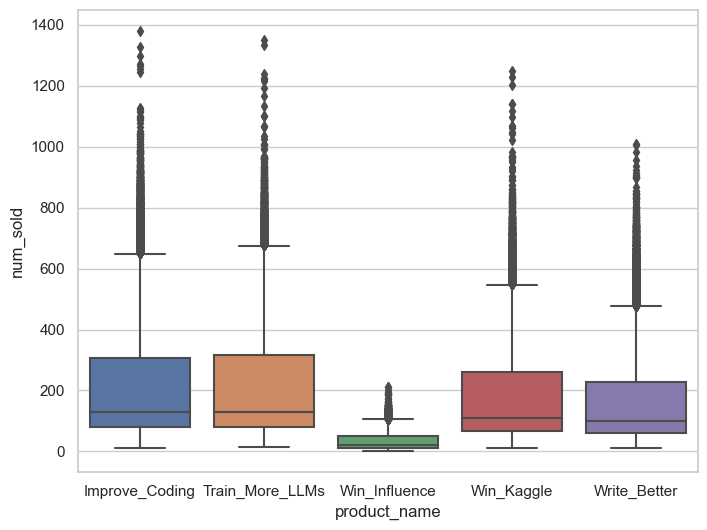

In [124]:
# checking boxplot distribution of total number of items sold per product category
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['product_name'], y=df['num_sold'])
plt.show()

We see lots of outliers in the boxplot. So, we will remove the outliers.

In [125]:
# defining function to remove outliers
# here we use the iqr method to remove outliers

def remove_outliers(dataframe, target_column, category_column):
    
    cleaned_dataframe = pd.DataFrame()

    grouped_data = dataframe.groupby(category_column)

    for category, category_data in grouped_data:
        Q1 = category_data[target_column].quantile(0.25)
        Q3 = category_data[target_column].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        cleaned_category_data = category_data[
                                (category_data[target_column] >= lower_limit) & 
                                (category_data[target_column] <= upper_limit)
                                ]
        cleaned_dataframe = pd.concat([cleaned_dataframe, cleaned_category_data], 
                            ignore_index=True)

    return cleaned_dataframe

In [126]:
cleaned_df = remove_outliers(df, 'num_sold', 'product_name')

In [127]:
cleaned_df.head()

,id,date,country,store,product,num_sold,product_name
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,Improve_Coding
1,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88,Improve_Coding
2,10,2017-01-01,Argentina,Kagglazon,Using LLMs to Improve Your Coding,340,Improve_Coding
3,15,2017-01-01,Canada,Kaggle Learn,Using LLMs to Improve Your Coding,202,Improve_Coding
4,20,2017-01-01,Canada,Kaggle Store,Using LLMs to Improve Your Coding,274,Improve_Coding


In [128]:
cleaned_df.groupby('product_name')['num_sold'].sum()

product_name
Improve_Coding     4661310
Train_More_LLMs    5010724
Win_Influence       793906
Win_Kaggle         3945711
Write_Better       3455967
Name: num_sold, dtype: int64

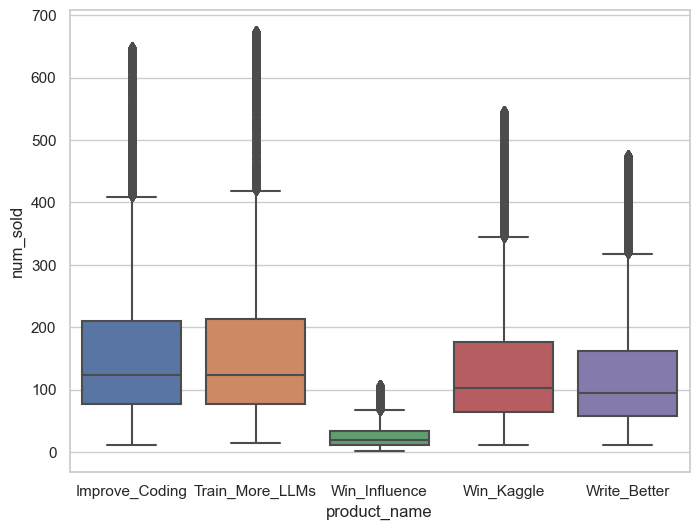

In [129]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_df['product_name'], y=cleaned_df['num_sold'])
plt.show()

In [130]:
# checking difference between original and cleaned dataset
print('Original:\n',df.groupby('product_name')['num_sold'].sum())
print('Cleaned:\n',cleaned_df.groupby('product_name')['num_sold'].sum())

Original:
 product_name
Improve_Coding     6069281
Train_More_LLMs    5993975
Win_Influence       932564
Win_Kaggle         5068313
Write_Better       4604192
Name: num_sold, dtype: int64
Cleaned:
 product_name
Improve_Coding     4661310
Train_More_LLMs    5010724
Win_Influence       793906
Win_Kaggle         3945711
Write_Better       3455967
Name: num_sold, dtype: int64


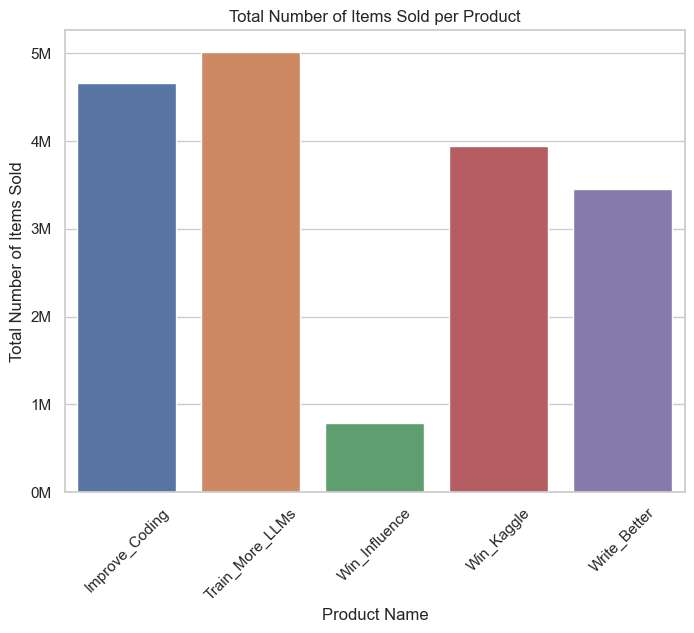

In [131]:
# visualizing total number of products sold per category

total_sold_per_product = cleaned_df.groupby('product_name')['num_sold'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=total_sold_per_product['product_name'], 
            y=total_sold_per_product['num_sold'])
plt.xticks(rotation=45)  # rotating x-axis labels for better readability
plt.xlabel('Product Name')
plt.ylabel('Total Number of Items Sold')

# converting total number of products sold to Millions
def millions_format(x, pos):
    return f'{int(x/1e6)}M'

formatter = mticker.FuncFormatter(millions_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Number of Items Sold per Product')
plt.show()

The barplot shows difference in total number of products sold per category and we can see some differences among the categories. But are the differences statistically significant?

### **One-way ANOVA**

At this point, we would like to run a one-way ANOVA test to check whether there is a statistically significant difference in number of products sold based on product category.

To run ANOVA, we need to create a regression model.

In [132]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [133]:
# constructing and fitting model
formula = 'num_sold ~ C(product_name)'
model = ols(formula = formula, data = cleaned_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6367.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:48:05   Log-Likelihood:            -8.1116e+05
No. Observations:              128850   AIC:                         1.622e+06
Df Residuals:                  128845   BIC:                         1.622e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            182.6174      0.821    222.431      0.000     181.008     184.227
C(product_name)[T.Train_More_LLMs]     9.4747      1.155      8.204      0.000       7.211      11.738
C(product_name)[T.Win_Influence]    -152.3469      1.153   -132.099      0.000    -154.607    -150.086
C(product_name)[T.Win_Kaggle]        -28.5603      1.160    -24.619      0.000     -30.834     -26.287
C(product_name)[T.Write_Better]      -46.5611      1.162    -40.053      0.000     -48.840     -44.283
==============================================================================
Omnibus:                    35115.376   Durbin-Watson:                   2.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77857.811
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                       5.100   Cond. No.                         5.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, the products' associated beta coefficients all have a p-value of less than 0.05. But we can't be sure if there is a significant difference for number of items sold between the various product category. This is where one-way ANOVA comes in.

**Null Hypothesis**

$$H_0: \mu_{\text{Improve\_Coding}} = \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Win\_Influence}} = \mu_{\text{Win\_Kaggle}} = \mu_{\text{Write\_Better}}$$

There is no difference in the number of items sold based on product category.

**Alternative Hypothesis**
$$H_0: \text{Not } \mu_{\text{Improve\_Coding}} = \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Win\_Influence}} = \mu_{\text{Win\_Kaggle}} = \mu_{\text{Write\_Better}}$$

There is a difference in the number of items sold based on product category.

In [134]:
# one way anova
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(product_name),4.0,4.381593e+08,1.095398e+08,6366.695742,0.0
Residual,128845.0,2.216795e+09,1.720513e+04,NaN,NaN


Since the p-value (column PR(>F)) is less than 0.05, we can reject the null hypothesis that the mean of the number of items sold is the same for each product category. So, there is a statistically significant difference in sales across product category.

### **ANOVA Post-hoc Test**

In the one-way ANOVA performed to test the differences in the total number of items sold based on product categories, the null hypothesis was rejected, indicating that there was a significant difference among the product categories. We can continue on to run a post hoc test. The post hoc test is useful because the one-way ANOVA does not tell us which products are associated with different quantities sold. The post hoc test will give us more information.

In [135]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_oneway = pairwise_tukeyhsd(endog=cleaned_df['num_sold'], 
                                groups=cleaned_df['product_name'], alpha=0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Improve_Coding,Train_More_LLMs,9.4747,0.0,6.3246,12.6248,True
Improve_Coding,Win_Influence,-152.3469,0.0,-155.4928,-149.201,True
Improve_Coding,Win_Kaggle,-28.5603,0.0,-31.7248,-25.3958,True
Improve_Coding,Write_Better,-46.5611,0.0,-49.7321,-43.3901,True
Train_More_LLMs,Win_Influence,-161.8216,0.0,-164.9503,-158.6929,True
Train_More_LLMs,Win_Kaggle,-38.035,0.0,-41.1824,-34.8876,True
Train_More_LLMs,Write_Better,-56.0358,0.0,-59.1898,-52.8818,True
Win_Influence,Win_Kaggle,123.7866,0.0,120.6434,126.9297,True
Win_Influence,Write_Better,105.7858,0.0,102.636,108.9356,True
Win_Kaggle,Write_Better,-18.0008,0.0,-21.1691,-14.8325,True


Each row represents a pairwise comparison between the number of items sold for two product categories. The reject column tells us which null hypotheses we can reject. Based on the values in that column, we can reject each null hypothesis.

##### **Test 1: Improve_Coding vs. Train_More_LLMs**
$$H_0: \mu_{\text{Improve\_Coding}} = \mu_{\text{Train\_More\_LLMs}}$$

The total number of items sold in Improve_Coding and Train_More_LLMs are the same.

$$H_1: \mu_{\text{Improve\_Coding}} \neq \mu_{\text{Train\_More\_LLMs}}$$

The total number of items sold in Improve_Coding and Train_More_LLMs are not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Improve_Coding and Train_More_LLMs are the same.

##### **Test 2: Improve_Coding vs. Win_Influence**
$$H_0: \mu_{\text{Improve\_Coding}} = \mu_{\text{Win\_Influence}}$$

The total number of items sold in Improve_Coding and Win_Influence are the same.

$$H_1: \mu_{\text{Improve\_Coding}} \neq \mu_{\text{Win\_Influence}}$$

The total number of items sold in Improve_Coding and Win_Influence are not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Improve_Coding and Win_Influence are the same.

##### **Test 3: Improve_Coding vs. Win_Kaggle**
$$H_0: \mu_{\text{Improve\_Coding}} = \mu_{\text{Win\_Kaggle}}$$

The total number of items sold in Improve_Coding and Win_Kaggle is the same.

$$H_1: \mu_{\text{Improve\_Coding}} \neq \mu_{\text{Win\_Kaggle}}$$

The total number of items sold in Improve_Coding and Win_Kaggle is not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Improve_Coding and Win_Kaggle is the same.


##### **Test 4: Improve_Coding vs. Write_Better**
$$H_0: \mu_{\text{Improve\_Coding}} = \mu_{\text{Write\_Better}}$$

The total number of items sold in Improve_Coding and Write_Better is the same.

$$H_1: \mu_{\text{Improve\_Coding}} \neq \mu_{\text{Write\_Better}}$$

The total number of items sold in Improve_Coding and Write_Better is not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Improve_Coding and Write_Better is the same.


##### **Test 5: Train_More_LLMs vs. Win_Influence**
$$H_0: \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Win\_Influence}}$$

The total number of items sold in Train_More_LLMs and Win_Influence is the same.

$$H_1: \mu_{\text{Train\_More\_LLMs}} \neq \mu_{\text{Win\_Influence}}$$

The total number of items sold in Train_More_LLMs and Win_Influence is not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Train_More_LLMs and Win_Influence is the same.

##### **Test 6: Train_More_LLMs vs. Win_Kaggle**
$$H_0: \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Win\_Kaggle}}$$

The total number of items sold in Train_More_LLMs and Win_Kaggle is the same.

$$H_1: \mu_{\text{Train\_More\_LLMs}} \neq \mu_{\text{Win\_Kaggle}}$$

The total number of items sold in Train_More_LLMs and Win_Kaggle is not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Train_More_LLMs and Win_Kaggle is the same.

##### **Test 7: Train_More_LLMs vs. Write_Better**
$$H_0: \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Write\_Better}}$$

The total number of items sold in Train_More_LLMs and Write_Better is the same.

$$H_1: \mu_{\text{Train\_More\_LLMs}} \neq \mu_{\text{Write\_Better}}$$

The total number of items sold in Train_More_LLMs and Write_Better is not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Train_More_LLMs and Write_Better is the same.

##### **Test 8: Win_Influence vs. Win_Kaggle**
$$H_0: \mu_{\text{Win\_Influence}} = \mu_{\text{Win\_Kaggle}}$$

The total number of items sold in Win_Influence and Win_Kaggle is the same.

$$H_1: \mu_{\text{Win\_Influence}} \neq \mu_{\text{Win\_Kaggle}}$$

The total number of items sold in Win_Influence and Win_Kaggle is not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Win_Influence and Win_Kaggle is the same.

##### **Test 9: Win_Influence vs. Write_Better**
$$H_0: \mu_{\text{Win\_Influence}} = \mu_{\text{Write\_Better}}$$

The total number of items sold in Win_Influence and Write_Better is the same.

$$H_1: \mu_{\text{Win\_Influence}} \neq \mu_{\text{Write\_Better}}$$

The total number of items sold in Win_Influence and Write_Better is not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Win_Influence and Write_Better is the same.

##### **Test 10: Win_Kaggle vs. Write_Better**
$$H_0: \mu_{\text{Win\_Kaggle}} = \mu_{\text{Write\_Better}}$$

The total number of items sold in Win_Kaggle and Write_Better is the same.

$$H_1: \mu_{\text{Win\_Kaggle}} \neq \mu_{\text{Write\_Better}}$$

The total number of items sold in Win_Kaggle and Write_Better is not the same.

**Result:** We *can* reject the null hypothesis that the total number of items sold in Win_Kaggle and Write_Better is the same.

### **Conclusion**

We can conclude that there is a statistically significant difference in sales based on product category. The ANOVA post-hoc test showed that there were significant differences between all categories.